In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv('planes.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [61]:
df.describe()

,Price
count,10044.000000
mean,9044.411191
std,4472.304869
min,1759.000000
25%,5276.750000
50%,8366.000000
75%,12373.000000
max,54826.000000


# Har bir ustunning o'ziga xos qiymatlari

In [62]:
print(df.nunique())

Airline               9
Date_of_Journey      44
Source                5
Destination           6
Route               126
Dep_Time            221
Arrival_Time       1334
Duration            367
Total_Stops           5
Additional_Info      10
Price              1806
dtype: int64


# Har columns ning NaN qiymatlar sonini aniqlash

In [63]:
df.isnull().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [64]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [65]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


# NaN qiymatla toldirish

In [66]:
df["Airline"]=df['Airline'].fillna(df['Airline'].mode()[0])
df["Date_of_Journey"]=df['Date_of_Journey'].fillna('None date')
df["Source"]=df['Source'].fillna("None Name")
df["Destination"]=df['Destination'].fillna('None name')
df["Route"]=df['Route'].fillna("None")
df["Dep_Time"]=df['Dep_Time'].fillna("None")
df["Arrival_Time"]=df['Arrival_Time'].fillna('None')
df["Duration"]=df['Duration'].fillna('None')
df["Total_Stops"]=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])
df["Additional_Info"]=df['Additional_Info'].fillna(df['Additional_Info'].mode()[0])
df["Price"]=df['Price'].fillna(df['Price'].mean())

In [67]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

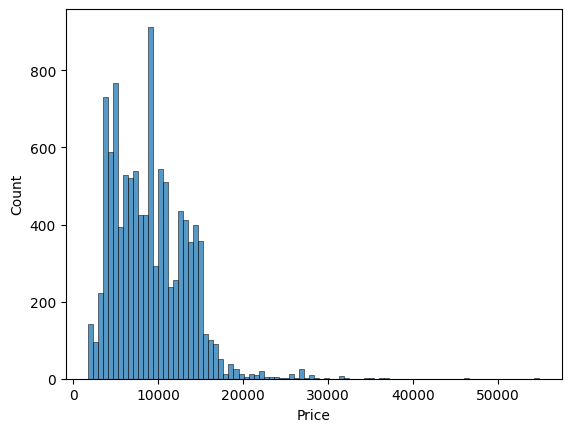

In [70]:
sns.histplot(data=df,x='Price')
plt.show()

<Axes: xlabel='Price'>

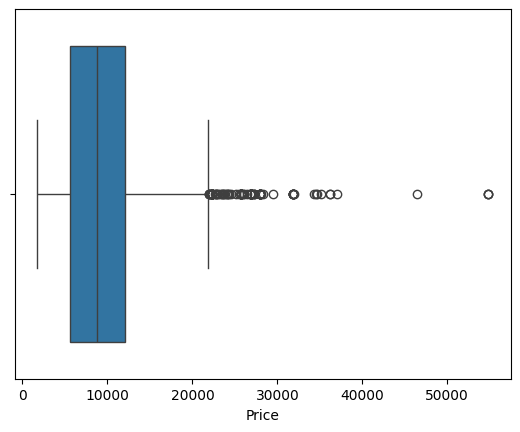

In [69]:
sns.boxplot(data=df, x='Price')

# Outliar ni olib tashlash

Text(0.5, 1.0, 'Without Outliers')

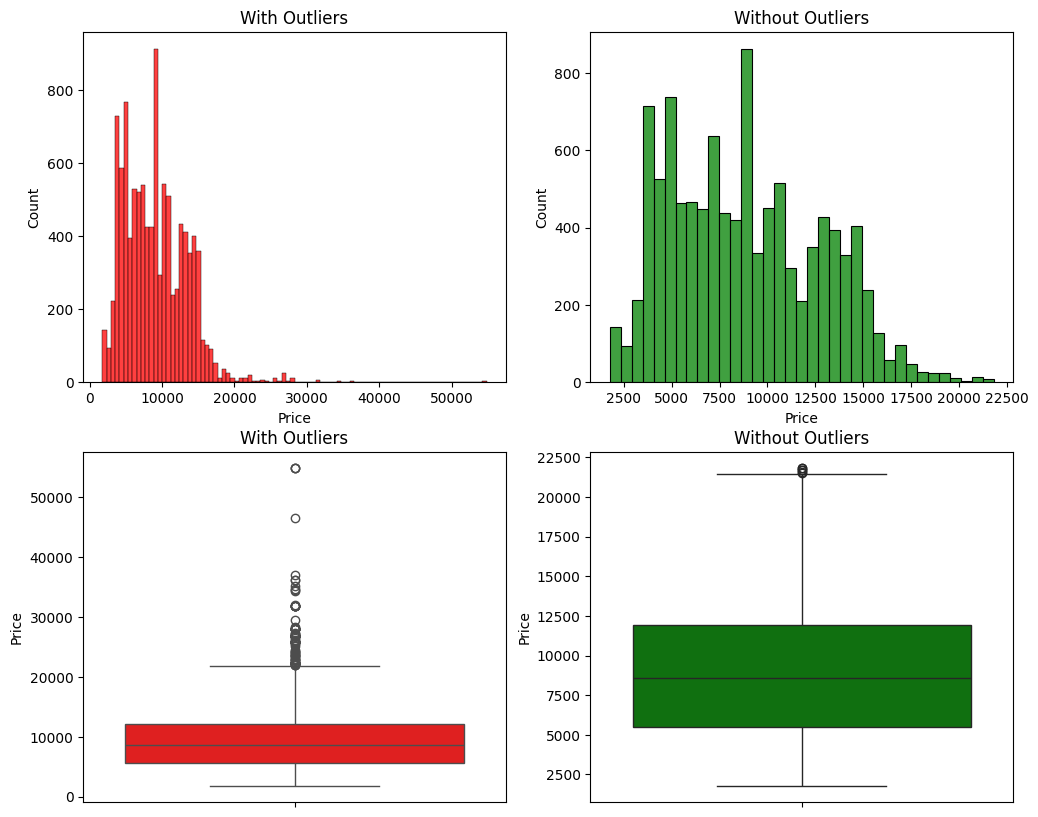

In [72]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

IQR = df["Price"].quantile(0.75) - df["Price"].quantile(0.25)

lower_limit = df["Price"].quantile(0.25) - IQR * 1.5
upper_limit = df["Price"].quantile(0.75) + IQR * 1.5

filltered_df = df[(df['Price'] >= lower_limit) & (df["Price"] <= upper_limit)]

sns.histplot(data=df, x="Price",ax=ax[0,0],color="r")
ax[0,0].set_title("With Outliers")
sns.histplot(data=filltered_df, x="Price",ax=ax[0,1],color="g")
ax[0,1].set_title("Without Outliers")

sns.boxplot(data=df, y="Price",ax=ax[1,0],color="r")
ax[1,0].set_title("With Outliers")

sns.boxplot(data=filltered_df, y="Price",ax=ax[1,1],color='g')
ax[1,1].set_title("Without Outliers")
